In [29]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Load and preprocess data
df = pd.read_csv("D:\\Sinophobia Sentiment Analysis\\Combined_data.csv")
df = df.dropna().reset_index(drop=True)
df

,Unnamed: 0,Tweet,text,date,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Joking,country,month
0,0,china’s yuan advanced to the strongest level ...,China’s #yuan advanced to the strongest level ...,2021-12-08 04:26:39,0,0,0,0,0,0,0,0,1,0,Australia,2021-12
1,1,retweet physician’s agency funded china’s bat...,RT @jsolomonReports: Fauci’s agency funded Chi...,2021-12-08 04:30:07,0,0,0,0,0,0,0,1,1,0,Australia,2021-12
2,2,retweet tim pool mocks canada’s authoritaria...,RT @TPostMillennial: Tim Pool @Timcast mocks C...,2021-12-08 04:45:21,0,0,0,0,0,0,0,0,0,1,Australia,2021-12
3,3,and yet china has yet to apologise for this f...,@globaltimesnews And yet China has yet to apol...,2021-12-08 04:49:55,0,0,0,0,0,0,1,1,0,0,Australia,2021-12
4,4,bbc news coronavirus vaccines should work a...,BBC News - Covid: Vaccines should work against...,2021-12-08 04:56:32,0,0,0,0,0,0,1,1,0,0,Australia,2021-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244726,268019,fascism 101 usps chief louis dejoy says he wi...,Fascism 101: USPS chief Louis DeJoy says he wo...,2020-08-21 16:28:19,0,0,0,0,0,0,1,0,1,0,UK,2020-08
244727,268020,usps chief louis dejoy says he will not restor...,USPS chief Louis DeJoy says he won't restore m...,2020-08-21 16:57:32,0,0,0,0,0,0,1,0,1,0,UK,2020-08
244728,268021,usps chief louis dejoy says he will not restor...,USPS chief Louis DeJoy says he won't restore m...,2020-08-21 20:18:03,0,0,0,0,0,0,0,0,1,0,UK,2020-08
244729,268022,retweet ⁣the inaugural helsinki biennial will...,RT @HELbiennial: ⁣The inaugural Helsinki Bienn...,2021-04-07 08:26:45,1,0,0,0,0,0,0,0,1,0,UK,2021-04


In [22]:
df['date'] = pd.to_datetime(df['date'])

india_df = df[df['country'] == 'India']

india_df['month_year'] = india_df['date'].dt.to_period('M')

monthly_counts = india_df.groupby('month_year').size()

all_months = pd.period_range(start=df['date'].min(), end=df['date'].max(), freq='M')
missing_months = all_months.difference(monthly_counts.index)

print("Missing months for India:")
print(missing_months)


Missing months for India:
PeriodIndex(['2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09',
             '2020-11', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
             '2022-01'],
            dtype='period[M]')


C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_27328\2529483019.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_df['month_year'] = india_df['date'].dt.to_period('M')


## Polarity Score Calculation using TextBlob

In [36]:
from textblob import TextBlob
#Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity

df['TextBlob_Polarity'] = df['Tweet'].apply(getPolarity)

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_27328\3808463592.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TextBlob_Polarity'], hist=True)


<Axes: xlabel='TextBlob_Polarity', ylabel='Density'>

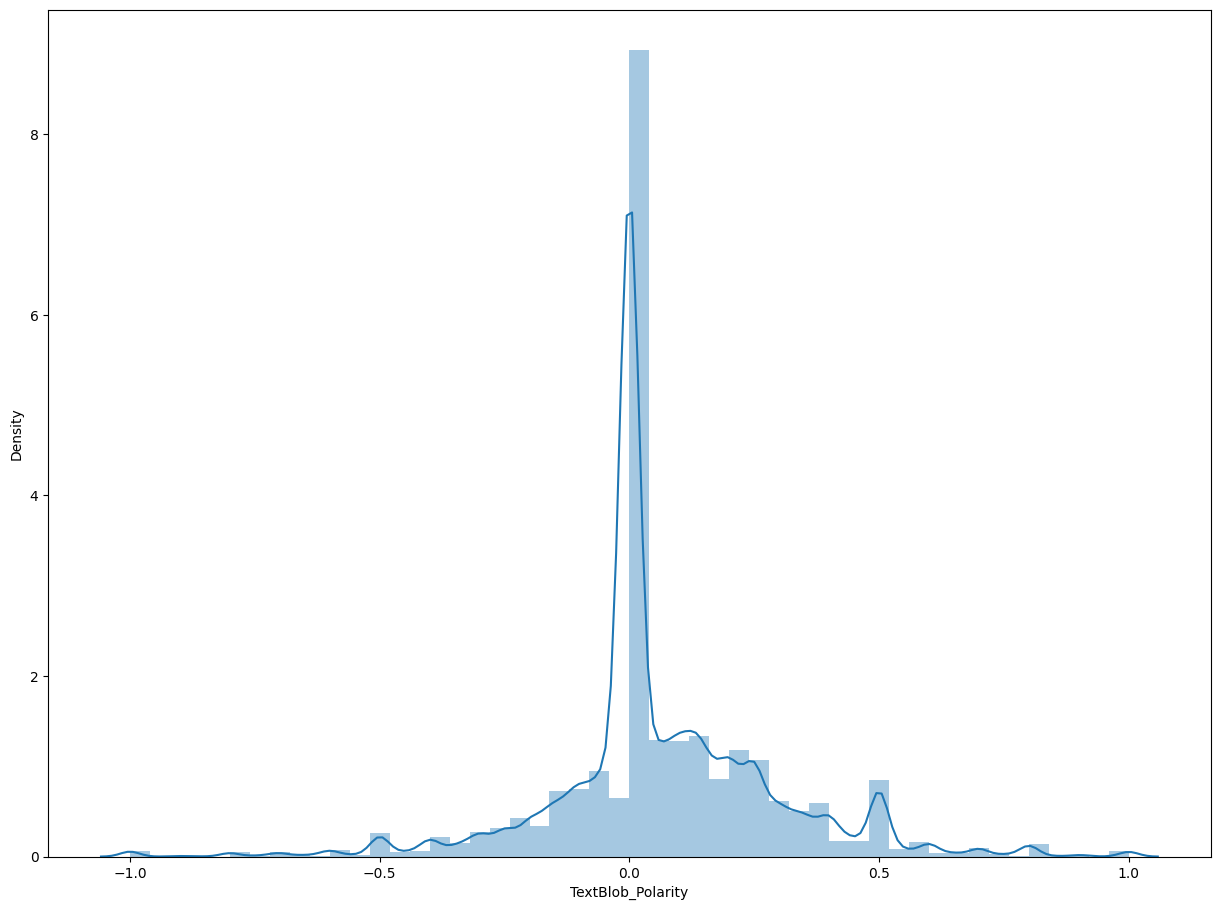

In [37]:
plt.figure(figsize = (15, 11))
sns.distplot(df['TextBlob_Polarity'], hist=True)

## Polarity Score Calculation using Custom Sentiment Labels and Weights

In [38]:
# Define sentiment polarity and weight ratios
sentiment_polarity = {
    'Optimistic': 2,
    'Thankful': 3,
    'Joking': 1,
    'Pessimistic': -4,
    'Anxious': -2,
    'Sad': -3,
    'Annoyed': -1,
    'Denial': -5,
    'Empathetic': 0,
    'Official report': 0
}

labels = list(sentiment_polarity.keys())
weight_ratios = {
    'Optimistic': 3,
    'Thankful': 2,
    'Empathetic': 0,
    'Pessimistic': -3,
    'Anxious': -2,
    'Sad': -2,
    'Annoyed': -1,
    'Denial': -4,
    'Official report': 0,
    'Joking': 1
}



In [39]:
# Function to calculate polarity scores
def calculate_polarity_scores(df, weight_ratios):
    # Apply weight ratios to sentiment labels
    weighted_df = df[labels].apply(lambda x: x * weight_ratios[x.name])
    # Sum up the weighted scores for each row
    df['polarity_score'] = weighted_df.sum(axis=1) / len(labels)
    return df

# Calculate polarity scores for the entire DataFrame
df = calculate_polarity_scores(df, weight_ratios)

df

,Unnamed: 0,Tweet,text,date,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Joking,country,month,polarity_score,TextBlob_Polarity
0,0,china’s yuan advanced to the strongest level ...,China’s #yuan advanced to the strongest level ...,2021-12-08 04:26:39,0,0,0,0,0,0,0,0,1,0,Australia,2021-12,0.0,0.268182
1,1,retweet physician’s agency funded china’s bat...,RT @jsolomonReports: Fauci’s agency funded Chi...,2021-12-08 04:30:07,0,0,0,0,0,0,0,1,1,0,Australia,2021-12,-0.4,0.000000
2,2,retweet tim pool mocks canada’s authoritaria...,RT @TPostMillennial: Tim Pool @Timcast mocks C...,2021-12-08 04:45:21,0,0,0,0,0,0,0,0,0,1,Australia,2021-12,0.1,0.136364
3,3,and yet china has yet to apologise for this f...,@globaltimesnews And yet China has yet to apol...,2021-12-08 04:49:55,0,0,0,0,0,0,1,1,0,0,Australia,2021-12,-0.5,0.000000
4,4,bbc news coronavirus vaccines should work a...,BBC News - Covid: Vaccines should work against...,2021-12-08 04:56:32,0,0,0,0,0,0,1,1,0,0,Australia,2021-12,-0.5,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244726,268019,fascism 101 usps chief louis dejoy says he wi...,Fascism 101: USPS chief Louis DeJoy says he wo...,2020-08-21 16:28:19,0,0,0,0,0,0,1,0,1,0,UK,2020-08,-0.1,0.000000
244727,268020,usps chief louis dejoy says he will not restor...,USPS chief Louis DeJoy says he won't restore m...,2020-08-21 16:57:32,0,0,0,0,0,0,1,0,1,0,UK,2020-08,-0.1,0.100000
244728,268021,usps chief louis dejoy says he will not restor...,USPS chief Louis DeJoy says he won't restore m...,2020-08-21 20:18:03,0,0,0,0,0,0,0,0,1,0,UK,2020-08,0.0,0.000000
244729,268022,retweet ⁣the inaugural helsinki biennial will...,RT @HELbiennial: ⁣The inaugural Helsinki Bienn...,2021-04-07 08:26:45,1,0,0,0,0,0,0,0,1,0,UK,2021-04,0.3,0.000000


C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_27328\3768144597.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] = weighted_df.sum(axis=1) / len(labels)
C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_27328\3768144597.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] = weighted_df.sum(axis=1) / len(labels)
C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_27328\3768144597.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

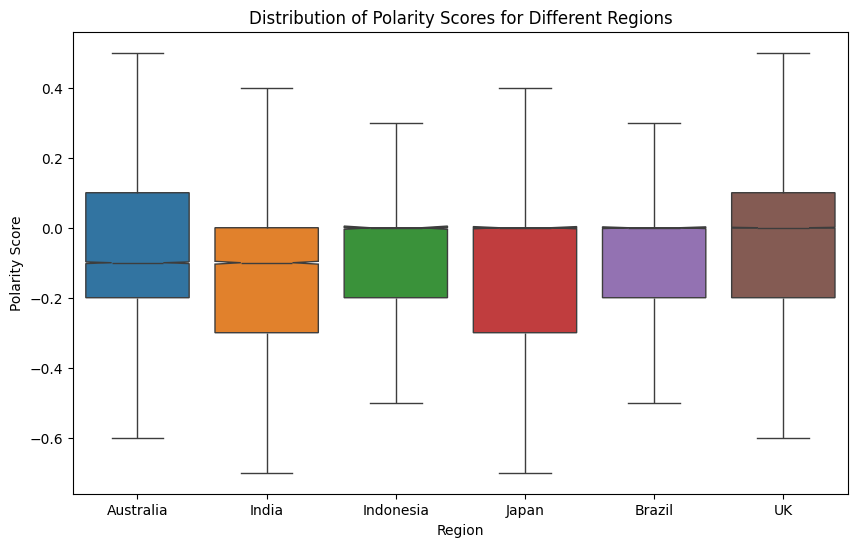

In [40]:
# Function to calculate polarity scores
def calculate_polarity_scores(df, weight_ratios):
    # Apply weight ratios to sentiment labels
    weighted_df = df[labels].apply(lambda x: x * weight_ratios[x.name])
    # Sum up the weighted scores for each row
    df['score'] = weighted_df.sum(axis=1) / len(labels)
    return df

# Filter data for specific countries
countries = ['Australia', 'India', 'Indonesia', 'Japan', 'Brazil', 'UK']
dfs = {country: df[df['country'] == country] for country in countries}

# Calculate polarity scores for each country
dfs = {country: calculate_polarity_scores(dfs[country], weight_ratios) for country in countries}

# Create a DataFrame from the polarity scores
polarity_df = pd.DataFrame({country: dfs[country]['score'] for country in countries})

# Plot the distribution of polarity scores for each country
plt.figure(figsize=(10, 6))
sns.boxplot(data=polarity_df, notch=True, showfliers=False)
plt.xlabel('Region')
plt.ylabel('Polarity Score')
plt.title('Distribution of Polarity Scores for Different Regions')
plt.xticks(range(len(countries)), countries)
plt.show()

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_27328\1393864688.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  resampled_dfs = {region: dfs[region].resample('Q').mean(numeric_only=True) for region in regions}
C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_27328\1393864688.py:13: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarters = pd.date_range(start=start_date, end=end_date, freq='Q')


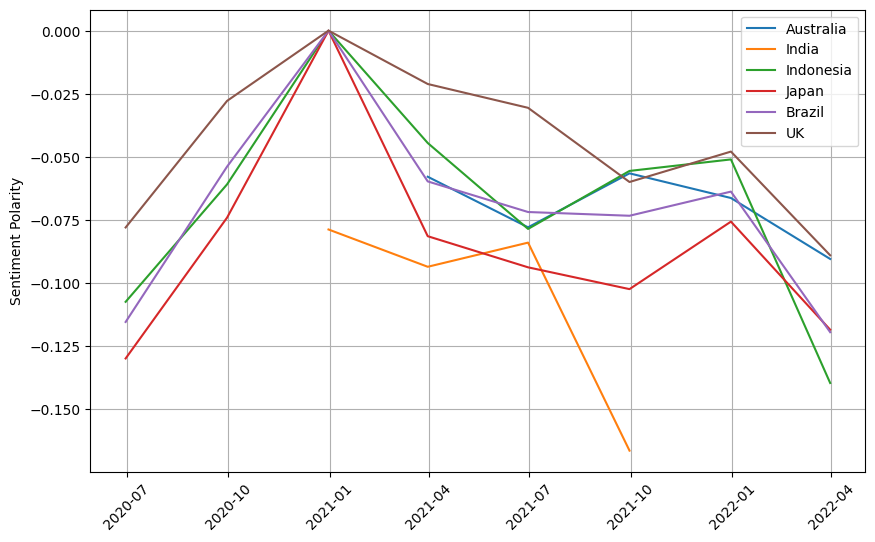

In [41]:
# Function to plot sentiment over quarters
def plot_sentiment_over_quarters_multi(dfs, regions, start_date='2018-01-01', end_date='2022-03-31'):
    dfs = {region: dfs[region].copy() for region in regions}
    dfs = {region: calculate_polarity_scores(dfs[region], weight_ratios) for region in regions}
    
    for region in regions:
        dfs[region]['date'] = pd.to_datetime(dfs[region]['date'])
        dfs[region].set_index('date', inplace=True)
    
    # Resample and calculate the mean for numeric columns only
    resampled_dfs = {region: dfs[region].resample('Q').mean(numeric_only=True) for region in regions}
    
    quarters = pd.date_range(start=start_date, end=end_date, freq='Q')
    df_resampled_filled = pd.DataFrame(index=quarters)
    
    for region in regions:
        df_resampled_filled[f'{region}_Sentiment'] = resampled_dfs[region]['score'].fillna(0)
    
    plt.figure(figsize=(10, 6))
    
    for region in regions:
        plt.plot(df_resampled_filled.index, df_resampled_filled[f'{region}_Sentiment'], label=region)
    
    plt.ylabel('Sentiment Polarity')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot sentiment over quarters for the specified regions
plot_sentiment_over_quarters_multi(dfs, countries)

In [42]:
df.columns

Index(['Unnamed: 0', 'Tweet', 'text', 'date', 'Optimistic', 'Thankful',
       'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial',
       'Official report', 'Joking', 'country', 'month', 'polarity_score',
       'TextBlob_Polarity'],
      dtype='object')

## Comparison of the two polarity score

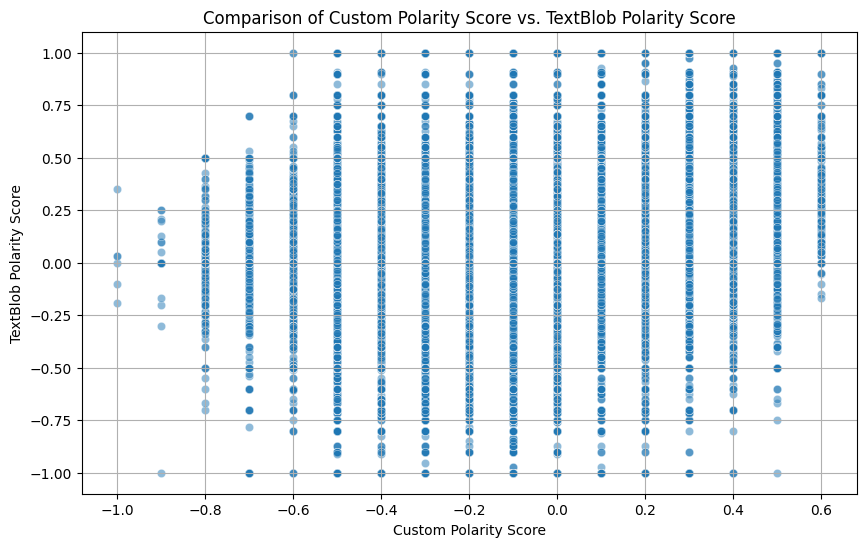

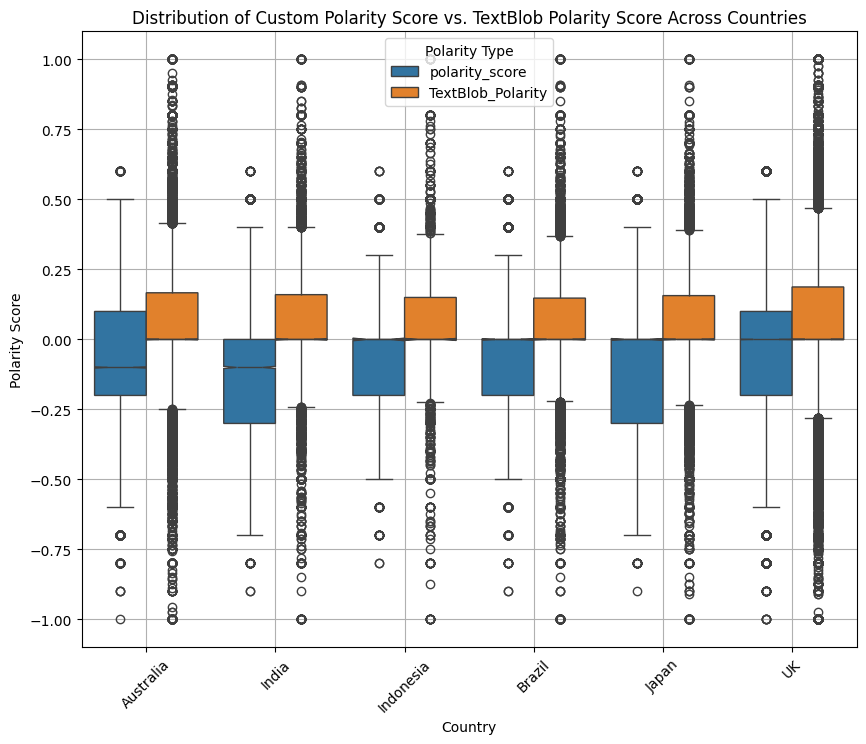

In [44]:
# Scatter Plot: Comparing Polarity Scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='polarity_score', y='TextBlob_Polarity', data=df, alpha=0.5)
plt.title('Comparison of Custom Polarity Score vs. TextBlob Polarity Score')
plt.xlabel('Custom Polarity Score')
plt.ylabel('TextBlob Polarity Score')
plt.grid(True)
plt.show()

# Boxplot: Distribution Comparison Across Countries
plt.figure(figsize=(10, 8))
df_melted = df.melt(id_vars=['country'], value_vars=['polarity_score', 'TextBlob_Polarity'],
                    var_name='Polarity Type', value_name='Score')
sns.boxplot(x='country', y='Score', hue='Polarity Type', data=df_melted, notch=True)
plt.title('Distribution of Custom Polarity Score vs. TextBlob Polarity Score Across Countries')
plt.xlabel('Country')
plt.ylabel('Polarity Score')
plt.xticks(rotation=45)
plt.legend(title='Polarity Type')
plt.grid(True)
plt.show()